In [ ]:

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

In [ ]:

# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [ ]:

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Prepare data for tensorflow and keras


In [ ]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)

# drop old label
df.drop(['label'], axis=1, inplace=True)

In [ ]:

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [ ]:

# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [ ]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.25
)

## Building Neural network!

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

In [ ]:
model = create_model()

In [ ]:
# Compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
# Fit the model to the training data
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Train on 84 samples, validate on 28 samples
Epoch 1/200
84/84 - 2s - loss: 1.1128 - accuracy: 0.3333 - val_loss: 1.1058 - val_accuracy: 0.2500
Epoch 2/200
84/84 - 0s - loss: 1.0607 - accuracy: 0.3333 - val_loss: 1.0590 - val_accuracy: 0.2500
Epoch 3/200
84/84 - 0s - loss: 1.0174 - accuracy: 0.3690 - val_loss: 1.0031 - val_accuracy: 0.3214
Epoch 4/200
84/84 - 0s - loss: 0.9657 - accuracy: 0.3571 - val_loss: 0.9609 - val_accuracy: 0.3214
Epoch 5/200
84/84 - 0s - loss: 0.9201 - accuracy: 0.4643 - val_loss: 0.8559 - val_accuracy: 0.5000
Epoch 6/200
84/84 - 0s - loss: 0.8424 - accuracy: 0.7262 - val_loss: 0.7655 - val_accuracy: 0.7500
Epoch 7/200
84/84 - 0s - loss: 0.7604 - accuracy: 0.6667 - val_loss: 0.6813 - val_accuracy: 0.9643
Epoch 8/200
84/84 - 0s - loss: 0.6549 - accuracy: 0.9048 - val_loss: 0.5648 - val_accuracy: 0.7500
Epoch 9/200
84/84 - 0s - loss: 0.6095 - accuracy: 0.6667 - val_loss: 0.5051 - val_accuracy: 0.7500
Epoch 10/200
84/84 - 0s - loss: 0.5549 - accuracy: 0.6667 - val_l

Epoch 83/200
84/84 - 0s - loss: 0.0514 - accuracy: 0.9762 - val_loss: 0.0517 - val_accuracy: 1.0000
Epoch 84/200
84/84 - 0s - loss: 0.0497 - accuracy: 0.9762 - val_loss: 0.0513 - val_accuracy: 1.0000
Epoch 85/200
84/84 - 0s - loss: 0.0494 - accuracy: 0.9762 - val_loss: 0.0487 - val_accuracy: 1.0000
Epoch 86/200
84/84 - 0s - loss: 0.0522 - accuracy: 0.9643 - val_loss: 0.0714 - val_accuracy: 0.9643
Epoch 87/200
84/84 - 0s - loss: 0.0756 - accuracy: 0.9762 - val_loss: 0.3010 - val_accuracy: 0.8929
Epoch 88/200
84/84 - 0s - loss: 0.1537 - accuracy: 0.9524 - val_loss: 0.1214 - val_accuracy: 0.9286
Epoch 89/200
84/84 - 0s - loss: 0.0618 - accuracy: 0.9762 - val_loss: 0.0452 - val_accuracy: 1.0000
Epoch 90/200
84/84 - 0s - loss: 0.0609 - accuracy: 0.9762 - val_loss: 0.1029 - val_accuracy: 0.9286
Epoch 91/200
84/84 - 0s - loss: 0.0770 - accuracy: 0.9762 - val_loss: 0.0457 - val_accuracy: 1.0000
Epoch 92/200
84/84 - 0s - loss: 0.0633 - accuracy: 0.9643 - val_loss: 0.4124 - val_accuracy: 0.8929


Epoch 165/200
84/84 - 0s - loss: 0.1287 - accuracy: 0.9405 - val_loss: 0.1220 - val_accuracy: 0.9286
Epoch 166/200
84/84 - 0s - loss: 0.0695 - accuracy: 0.9762 - val_loss: 0.0817 - val_accuracy: 0.9286
Epoch 167/200
84/84 - 0s - loss: 0.0551 - accuracy: 0.9762 - val_loss: 0.2169 - val_accuracy: 0.8929
Epoch 168/200
84/84 - 0s - loss: 0.1235 - accuracy: 0.9524 - val_loss: 0.2116 - val_accuracy: 0.8929
Epoch 169/200
84/84 - 0s - loss: 0.1065 - accuracy: 0.9524 - val_loss: 0.1057 - val_accuracy: 0.9286
Epoch 170/200
84/84 - 0s - loss: 0.0532 - accuracy: 0.9762 - val_loss: 0.0663 - val_accuracy: 1.0000
Epoch 171/200
84/84 - 0s - loss: 0.0538 - accuracy: 1.0000 - val_loss: 0.0976 - val_accuracy: 0.9286
Epoch 172/200
84/84 - 0s - loss: 0.0690 - accuracy: 0.9643 - val_loss: 0.0560 - val_accuracy: 1.0000
Epoch 173/200
84/84 - 0s - loss: 0.0556 - accuracy: 0.9762 - val_loss: 0.0891 - val_accuracy: 0.9286
Epoch 174/200
84/84 - 0s - loss: 0.0577 - accuracy: 0.9762 - val_loss: 0.1156 - val_accurac

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

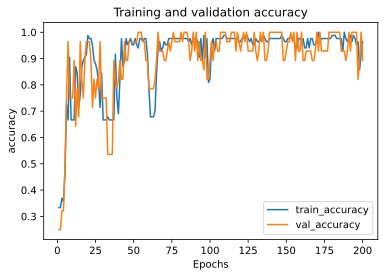

In [ ]:
plot_metric(history, 'accuracy')

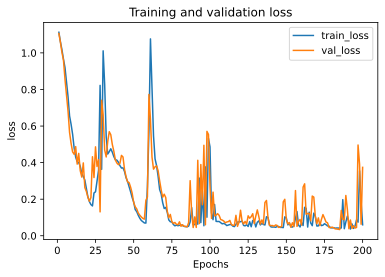

In [ ]:
plot_metric(history, 'loss')

From the above graph, we can see that the model has overfitted the training data, so it outperforms the validation set.

### Early Stopping with default settings

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping() # by default, monitor='val_loss' and patience=1

- monitor='val_loss': to use validation loss as performance measure to terminate the training.
- patience=0: is the number of epochs with no improvement. The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.

In [ ]:
#pass the callback object to model.fit() method.
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[early_stopping]
)

Train on 84 samples, validate on 28 samples
Epoch 1/200
84/84 - 0s - loss: 0.1046 - accuracy: 0.9643 - val_loss: 0.0868 - val_accuracy: 0.9286
Epoch 2/200
84/84 - 0s - loss: 0.0577 - accuracy: 0.9762 - val_loss: 0.0468 - val_accuracy: 1.0000
Epoch 3/200
84/84 - 0s - loss: 0.0391 - accuracy: 1.0000 - val_loss: 0.0558 - val_accuracy: 1.0000


The training gets terminated at Epoch 2or3 due to the increase of val_loss value and that is exactly the conditions monitor='val_loss' and patience=0

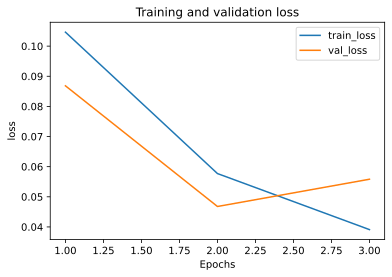

In [ ]:
plot_metric(history, 'loss')

plot shows that validation loss increases after epoch 2


### Few more features in Early Stopping
- **min_delta**: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
- **mode='auto'**: Should be one of auto, min or max. In 'min' mode, training will stop when the quantity monitored has stopped decreasing; in 'max' mode it will stop when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.


In [ ]:

custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

In [ ]:

history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[custom_early_stopping]
)

Train on 84 samples, validate on 28 samples
Epoch 1/200
84/84 - 0s - loss: 0.0422 - accuracy: 0.9762 - val_loss: 0.0474 - val_accuracy: 1.0000
Epoch 2/200
84/84 - 0s - loss: 0.0421 - accuracy: 0.9762 - val_loss: 0.0363 - val_accuracy: 1.0000
Epoch 3/200
84/84 - 0s - loss: 0.0372 - accuracy: 0.9762 - val_loss: 0.0409 - val_accuracy: 1.0000
Epoch 4/200
84/84 - 0s - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.0460 - val_accuracy: 1.0000
Epoch 5/200
84/84 - 0s - loss: 0.0389 - accuracy: 0.9881 - val_loss: 0.0361 - val_accuracy: 1.0000
Epoch 6/200
84/84 - 0s - loss: 0.0368 - accuracy: 0.9762 - val_loss: 0.0315 - val_accuracy: 1.0000
Epoch 7/200
84/84 - 0s - loss: 0.0373 - accuracy: 0.9762 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 8/200
84/84 - 0s - loss: 0.0376 - accuracy: 0.9762 - val_loss: 0.0305 - val_accuracy: 1.0000
Epoch 9/200
84/84 - 0s - loss: 0.0388 - accuracy: 0.9762 - val_loss: 0.0692 - val_accuracy: 0.9643


monitor='val_accuracy' to use validation accuracy as performance measure to terminate the training. patience=8 means the training is terminated as soon as 8 epochs with no improvement. min_delta=0.001 means the validation accuracy has to improve by at least 0.001 for it to count as an improvement. mode='max' means it will stop when the quantity monitored has stopped increasing.

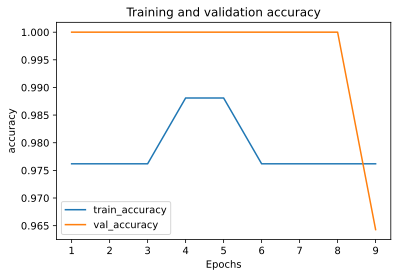

In [ ]:
plot_metric(history, 'accuracy')

This time, the training gets terminated at Epoch 9 as there are 8 epochs with no improvement on validation accuracy (It has to be ≥ 0.001 to count as an improvement). For a clear picture, let’s look at a plot representation of accuracy by running plot_metric(history, 'accuracy'). In the below graph, validation accuracy is shown in orange and it’s clear that validation accuracy hasn’t got any improvement.